In [1]:
import numpy as np
import pandas as pd
import scipy.io as si
import os
import glob
import librosa
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint ,EarlyStopping
from keras.layers.wrappers import Bidirectional
from keras.utils.generic_utils import Progbar
from keras.layers.normalization import BatchNormalization
#from keras.utils.visualize_util import plot
from keras.layers import LSTM, Dropout, GRU, Convolution1D,  MaxPooling1D, Flatten,Reshape
from keras.layers import Input, Dense, Dropout, TimeDistributed, GlobalAveragePooling1D
import sys
import numpy
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  tf.config.experimental.set_memory_growth(gpus[0], True)
import copy
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from scipy.io import savemat
import scipy.io.wavfile as wf
import sys
from keras.optimizers import SGD,Adam
import scipy.io
import collections
from keras.layers import Masking
import matplotlib.pyplot as plt
import Github_imp

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
mfccTotal = []
os.chdir('/home2/data/Manthan/008/101/MCEP')
for wavFile in sorted(glob.glob("spliced*.mat")):
    #print(wavFile)
    coded_sp=(si.loadmat(wavFile))['coded_sp']
    #print(wavFile)
    ap=(si.loadmat(wavFile))['ap']
    f0=(si.loadmat(wavFile))['f0']
    coded_sp=np.array(coded_sp)
    ap=np.transpose(np.array(ap))
    f0=np.array(f0)
    #coded_sp=(coded_sp-np.array(s_mean))/np.array(s_std)
    #print(coded_sp.shape)
    #print(ap.shape)
    #print(f0.shape)
    y_framed=np.concatenate(( coded_sp,ap,f0),axis=0)
    coded_sp=np.transpose(coded_sp)
    #coded_sp_mean=np.mean(coded_sp,axis=0)
    #coded_sp_std=np.std(coded_sp,axis=0)
    #coded_sp=(coded_sp-coded_sp_mean)/coded_sp_std
    mfccTotal.append(coded_sp)

In [3]:
"""
emgTotal=[]
os.chdir('/home2/data/Manthan/008/101/ProcessedMAV/UKA/')
for emgFile in sorted(glob.glob("*.mat")):
        emg = si.loadmat(emgFile)
        emgArr = emg['data']
        #print(emgArr.shape)
        emg_mean=np.mean(emgArr,axis=0)
        emg_std=np.std(emgArr,axis=0)
        emgArr=(emgArr-emg_mean)/emg_std
        #print(max(emgArr[:,0]),min(emgArr[:,0]))
        emgTotal.append(emgArr)
print("done EMG")
"""

'\nemgTotal=[]\nos.chdir(\'/home2/data/Manthan/008/101/ProcessedMAV/UKA/\')\nfor emgFile in sorted(glob.glob("*.mat")):\n        emg = si.loadmat(emgFile)\n        emgArr = emg[\'data\']\n        #print(emgArr.shape)\n        emg_mean=np.mean(emgArr,axis=0)\n        emg_std=np.std(emgArr,axis=0)\n        emgArr=(emgArr-emg_mean)/emg_std\n        #print(max(emgArr[:,0]),min(emgArr[:,0]))\n        emgTotal.append(emgArr)\nprint("done EMG")\n'

In [4]:

#TD EMG
emgTotal=[]
os.chdir("/home2/data/Manthan/008/101/")
for emgFile in sorted(glob.glob('spliced*.mat')):
    cur_emg=scipy.io.loadmat(emgFile)
    cur_emg=cur_emg['ADC_modified']
    cur_emg=cur_emg[:6,:]
    cur_emg=np.transpose(cur_emg)
    #print(cur_emg.shape)
    cur_emg_td=Github_imp.get_emg_features(cur_emg)
    print(cur_emg_td.shape)
    mean=np.mean(cur_emg_td,axis=0)
    std=np.std(cur_emg_td,axis=0)
    cur_emg_td=(cur_emg_td-mean)/std
    emgTotal.append(cur_emg_td)
    #print(cur_emg_td.shape)
print("EMG DONE")


(367, 30)
(322, 30)
(338, 30)
(289, 30)
(373, 30)
(282, 30)
(231, 30)
(260, 30)
(197, 30)
(340, 30)
(341, 30)
(481, 30)
(405, 30)
(244, 30)
(345, 30)
(399, 30)
(415, 30)
(277, 30)
(281, 30)
(260, 30)
(229, 30)
(309, 30)
(348, 30)
(241, 30)
(462, 30)
(413, 30)
(282, 30)
(309, 30)
(386, 30)
(341, 30)
(300, 30)
(178, 30)
(308, 30)
(372, 30)
(333, 30)
(256, 30)
(242, 30)
(383, 30)
(149, 30)
(322, 30)
(209, 30)
(381, 30)
(162, 30)
(242, 30)
(235, 30)
(348, 30)
(314, 30)
(330, 30)
(302, 30)
(361, 30)
(352, 30)
(283, 30)
(336, 30)
(257, 30)
(277, 30)
(322, 30)
(339, 30)
(277, 30)
(278, 30)
(289, 30)
(325, 30)
(418, 30)
(370, 30)
(292, 30)
(251, 30)
(271, 30)
(376, 30)
(347, 30)
(344, 30)
(304, 30)
(242, 30)
(223, 30)
(223, 30)
(376, 30)
(312, 30)
(264, 30)
(225, 30)
(383, 30)
(363, 30)
(319, 30)
(312, 30)
(255, 30)
(335, 30)
(274, 30)
(257, 30)
(278, 30)
(414, 30)
(277, 30)
(259, 30)
(354, 30)
(186, 30)
(408, 30)
(248, 30)
(270, 30)
(225, 30)
(328, 30)
(456, 30)
(267, 30)
(296, 30)
(373, 30)


In [5]:
for i in range(len(emgTotal)):
    print('orig',len(emgTotal[i]),len(mfccTotal[i]))
    if(len(emgTotal[i]) > len(mfccTotal[i])):
        subLen = len(emgTotal[i]) - len(mfccTotal[i])
        change = len(emgTotal[i]) - subLen
        #print(subLen)
        emgTotal[i] = emgTotal[i][:change,:]       
    if(len(mfccTotal[i]) > len(emgTotal[i])):
        subLen = len(mfccTotal[i]) - len(emgTotal[i])
        change = len(mfccTotal[i]) - subLen
        #print(subLen)
        mfccTotal[i] = mfccTotal[i][:change,:]
    print('new',len(emgTotal[i]),len(mfccTotal[i]))

orig 367 369
new 367 367
orig 322 325
new 322 322
orig 338 341
new 338 338
orig 289 291
new 289 289
orig 373 376
new 373 373
orig 282 285
new 282 282
orig 231 233
new 231 231
orig 260 263
new 260 260
orig 197 200
new 197 197
orig 340 342
new 340 340
orig 341 344
new 341 341
orig 481 484
new 481 481
orig 405 408
new 405 405
orig 244 246
new 244 244
orig 345 347
new 345 345
orig 399 402
new 399 399
orig 415 417
new 415 415
orig 277 280
new 277 277
orig 281 283
new 281 281
orig 260 263
new 260 260
orig 229 231
new 229 229
orig 309 311
new 309 309
orig 348 350
new 348 348
orig 241 243
new 241 241
orig 462 465
new 462 462
orig 413 415
new 413 413
orig 282 285
new 282 282
orig 309 312
new 309 309
orig 386 388
new 386 386
orig 341 344
new 341 341
orig 300 303
new 300 300
orig 178 181
new 178 178
orig 308 311
new 308 308
orig 372 374
new 372 372
orig 333 335
new 333 333
orig 256 258
new 256 256
orig 242 245
new 242 242
orig 383 385
new 383 383
orig 149 152
new 149 149
orig 322 324
new 322 322


In [6]:
emgCalc = copy.deepcopy(emgTotal)
X1 =emgCalc
y = mfccTotal 

In [7]:
from sklearn.model_selection import train_test_split
XP,X1_test, YP, y_test = train_test_split(X1, y, test_size = 0.05, random_state=42,shuffle=True)
X_train,X_val, Y_train, Y_val = train_test_split(XP, YP, test_size = 0.05, random_state=42,shuffle=True)

In [8]:
Y_train=np.array(Y_train)
y_test=np.array(y_test)
Y_val=np.array(Y_val)

In [9]:
for i in range(len(X_train)):
    X_train[i] = np.transpose(X_train[i])
    Y_train[i] = np.transpose(Y_train[i])

for j in range(len(X_val)):
    X_val[j] = np.transpose(X_val[j])
    Y_val[j] = np.transpose(Y_val[j])

In [10]:
TT_max=490#np.max(TT_Total)


for i in range(len(X_val)):
    X_val[i] = np.transpose(pad_sequences(X_val[i], padding='post',maxlen=TT_max,dtype='float'))

for i in range(len(X_train)):
    X_train[i] = np.transpose(pad_sequences(X_train[i], padding='post',maxlen=TT_max,dtype='float'))
    
for i in range(len(Y_train)):
    Y_train[i] = np.transpose(pad_sequences(Y_train[i], padding='post',maxlen=TT_max,dtype='float'))

for i in range(len(Y_val)):
    Y_val[i] = np.transpose(pad_sequences(Y_val[i], padding='post',maxlen=TT_max,dtype='float'))

In [11]:
OutDir = '/home2/data/Manthan/UKA_Corpus/MCEP/'

In [12]:
Y_train=np.array(Y_train)
y_test=np.array(y_test)
Y_val=np.array(Y_val)

In [13]:
NoUnits=128 #LSTM units
BatchSize=32
NoEpoch=75
std_frac=0.25
n_mfcc=25
inputDim=30

In [14]:
print('..compiling model')
mdninput_Lstm= keras.Input(shape=(None,inputDim))
mdninput_Lstm_1= Masking(mask_value=0.)(mdninput_Lstm)
lstm_1=Bidirectional(LSTM(NoUnits, return_sequences=True,activation='tanh', dropout = 0.2))(mdninput_Lstm_1)
lstm_2a=Bidirectional(LSTM(NoUnits, return_sequences=True,activation='tanh', dropout = 0.2))(lstm_1)
lstm_2=Bidirectional(LSTM(NoUnits, return_sequences=True,activation='tanh',dropout = 0.2))(lstm_2a)
#lstm_2b=Bidirectional(LSTM(NoUnits, return_sequences=True,activation='tanh',dropout = 0.4))(lstm_2)
#lstm_2c=Bidirectional(LSTM(NoUnits, return_sequences=True,activation='tanh',dropout = 0.2))(lstm_2b)
#lstm_2d=Bidirectional(LSTM(NoUnits, return_sequences=True,activation='tanh',dropout = 0.2))(lstm_2c)
output=TimeDistributed(Dense(n_mfcc, activation='linear'))(lstm_2)
model = keras.models.Model(mdninput_Lstm,output)
model.summary()
print('\n\nModel with input size {}, output size {}'.format(model.input_shape, model.output_shape))

..compiling model
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 30)]        0         
_________________________________________________________________
masking (Masking)            (None, None, 30)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         162816    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         394240    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 256)         394240    
_________________________________________________________________
time_distributed (TimeDistri (None, None, 25)          6425      
Total params: 957,721
Trainable params: 957,721
Non-trainable params: 0
______________________________

In [15]:
model.compile(optimizer='adam', loss='mse')

In [16]:
OutFileName='008_Trial_1_18_June_BLSTM'+'Batch'+ str(BatchSize)+'_'+'_LSTMunits_pred'+str(NoUnits)+'_'+'_Sent_Norm_'
fName=OutFileName

In [17]:
X_train_1=[]
Y_train_1=[]
X_val_1=[]
Y_val_1=[]
for i in range(len(X_train)):
        X_train_1.append(np.array(X_train[i]))
        Y_train_1.append(np.array(Y_train[i]))
for i in range(len(X_val)):
        X_val_1.append(np.array(X_val[i]))
        Y_val_1.append(np.array(Y_val[i]))

In [18]:
print('..fitting model')

checkpointer = ModelCheckpoint(filepath=OutDir+fName + '_.h5', verbose=0, save_best_only=True)
checkpointer1 = ModelCheckpoint(filepath=OutDir+fName + '_weights.h5', verbose=0, save_best_only=True, save_weights_only=True)
earlystopper =EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(np.array(X_train_1),np.array(Y_train_1),validation_data=(np.array(X_val_1),np.array(Y_val_1)),epochs=NoEpoch, batch_size=BatchSize,verbose=1,shuffle=True,callbacks=[checkpointer,checkpointer1,earlystopper])


..fitting model
Epoch 1/75
15/15 [==============================] - 8s 564ms/step - loss: 1.9543 - val_loss: 0.4717
Epoch 2/75
15/15 [==============================] - 2s 116ms/step - loss: 0.3454 - val_loss: 0.2757
Epoch 3/75
15/15 [==============================] - 2s 116ms/step - loss: 0.2338 - val_loss: 0.2150
Epoch 4/75
15/15 [==============================] - 2s 121ms/step - loss: 0.2050 - val_loss: 0.2105
Epoch 5/75
15/15 [==============================] - 2s 114ms/step - loss: 0.1989 - val_loss: 0.2029
Epoch 6/75
15/15 [==============================] - 2s 115ms/step - loss: 0.1922 - val_loss: 0.1968
Epoch 7/75
15/15 [==============================] - 2s 124ms/step - loss: 0.1833 - val_loss: 0.1835
Epoch 8/75
15/15 [==============================] - 2s 111ms/step - loss: 0.1722 - val_loss: 0.1736
Epoch 9/75
15/15 [==============================] - 2s 114ms/step - loss: 0.1636 - val_loss: 0.1673
Epoch 10/75
15/15 [==============================] - 2s 119ms/step - loss: 0.1581 - 

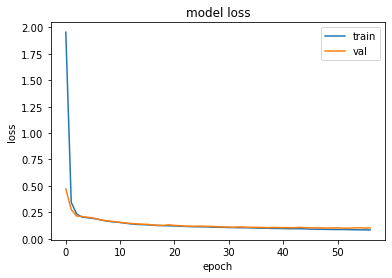

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
#plt.savefig(OutDir+OutFileName+'foo.png')

In [20]:
X_test = []
Y_test = []
for i in np.arange(0,len(y_test)):
            E_t = y_test[i]
            M_t = X1_test[i]
            #W_t=W_t[np.newaxis,:,:,np.newaxis]
            E_t=E_t[np.newaxis,:,:]
            M_t=M_t[np.newaxis,:,:]
            Y_test.append(E_t)
            X_test.append(M_t)

In [21]:
yPred = []
for x in range(len(X_test)):
    y_pred = model.predict(X_test[x])
    yPred.append(y_pred)
    print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [22]:
for i in range(len(yPred)):
    yPred[i] = np.squeeze(yPred[i],axis=0)
    Y_test[i] = np.squeeze(Y_test[i],axis=0)

In [23]:
h=model.get_weights()
si.savemat(OutDir+OutFileName+'out_.mat', {'weights':h, 'Test_Predicted':yPred, 'Test_target':Y_test})